<h1> <center> Final Group Project Group 9 Jupyter Notebook </center> </h1>

<h3> <center> Andreas Jose Martinez, Vivi Jimenez, Keerti Shetty, Sebastião Manuel Inácio Rosalino </center> </h3>

## **Data Import**

In [185]:
import pandas as pd

In [186]:
# converts the csv into a pandas dataframe

michelin_information = pd.read_csv('michelin_information.csv')

In [187]:
michelin_information

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
0,Les Amis,"Shaw Centre, #01-16, 1 Scotts Road, 228208, Si...",Singapore,225,460,SGD,French,103.832040,1.306260,6.567332e+09,https://guide.michelin.com/en/singapore-region...,https://www.lesamis.com.sg/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
1,Odette,"National Gallery, #01-04, 1 St. Andrew's Road ...",Singapore,298,428,SGD,French Contemporary,103.851600,1.289646,6.563850e+09,https://guide.michelin.com/en/singapore-region...,http://www.odetterestaurant.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
2,Zén,"41 Bukit Pasoh Road, 089855, Singapore",Singapore,580,580,SGD,European Contemporary,103.840420,1.279627,6.592366e+09,https://guide.michelin.com/en/singapore-region...,http://www.restaurantzen.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
3,Maaemo,"Dronning Eufemias gate 23, Oslo, 0194, Norway",Oslo,"3,500","3,500",NOK,"Modern Cuisine, Creative",10.758636,59.907529,4.722180e+09,https://guide.michelin.com/en/oslo-region/oslo...,http://www.maaemo.no,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
4,Geranium,"Per Henrik Lings Allé, Parken National Stadium...",Copenhagen,"3,200","3,200",DKK,"Creative, Contemporary",12.572529,55.704085,4.569960e+09,https://guide.michelin.com/en/capital-region/c...,https://www.geranium.dk/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6522,Szóstka,"Plac Powstańców Warszawy 9, Warsaw, 00 039, Po...",Warsaw,180,180,PLN,"Polish, Modern Cuisine",21.012698,52.235803,4.822470e+10,https://guide.michelin.com/en/masovia/warsaw/r...,https://warszawa.hotel.com.pl/hotel-warszawa,Bib Gourmand,"Air conditioning,American Express credit card,..."
6523,Fiorentina,"ul. Grodzka 63, Cracow, 31 044, Poland",Cracow,175,290,PLN,"Creative, Polish",19.938179,50.055898,4.812426e+10,https://guide.michelin.com/en/lesser-poland/cr...,https://fiorentina.com.pl/,Bib Gourmand,"Air conditioning,American Express credit card,..."
6524,Zazie,"ul. Józefa 34, Cracow, 32 056, Poland",Cracow,41,113,PLN,French,19.946949,50.051240,4.850041e+10,https://guide.michelin.com/en/lesser-poland/cr...,http://www.zaziebistro.pl/,Bib Gourmand,"Air conditioning,Booking essential - dinner,Cr..."
6525,Butchery & Wine,"ul. Żurawia 22, Warsaw, 00 515, Poland",Warsaw,235,235,PLN,"Meats and Grills, Traditional Cuisine",21.015495,52.228581,4.822502e+10,https://guide.michelin.com/en/masovia/warsaw/r...,https://www.butcheryandwine.pl/,Bib Gourmand,"American Express credit card,Booking essential..."


## **Data engineering**

In [188]:
# A function which takes the address as the input and retrieves the country from the address

def country(address):
    splitted_list = address.split(',')
    return splitted_list[-1].strip()


# Address column replaced with results from the country function for each address value from the initial address column                    
michelin_information['Address'] = michelin_information['Address'].apply(country)

# A new dataframe resulted from the filtering made where the address is "France"
michelin_information_france = michelin_information[michelin_information['Address'] == "France"]

# Renaming location as City
michelin_information_france = michelin_information_france.rename(columns={"Location":"City"})

# removing currency column from the dataframe as it is redundant
michelin_information_france.drop(['Currency'], axis=1, inplace=True)

# reseting the index
michelin_information_france.index = range(len(michelin_information_france))

michelin_information_france

,Name,Address,City,MinPrice,MaxPrice,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
0,Le Pré Catelan,France,Paris,150,330,"Creative, Modern Cuisine",2.250718,48.863937,3.314414e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.leprecatelan.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
1,Alléno Paris au Pavillon Ledoyen,France,Paris,280,395,Creative,2.316499,48.866093,3.315305e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.yannick-alleno.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
2,Arpège,France,Paris,185,460,Creative,2.316965,48.855731,3.314705e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.alain-passard.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
3,Épicure,France,Paris,350,395,Modern Cuisine,2.314366,48.871729,3.315343e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.oetkercollection.com/fr/hotels/le-...,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
4,Plénitude - Cheval Blanc Paris,France,Paris,330,405,Creative,2.342159,48.858815,3.317936e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.chevalblanc.com/en/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,La Ferme de la Haute Crémonville,France,Saint-Étienne-du-Vauvray,33,55,Traditional Cuisine,1.200692,49.240624,3.323259e+10,https://guide.michelin.com/en/normandie/saint-...,https://www.lafermedelahautecremonville.com/,Bib Gourmand,"Air conditioning,Car park,Credit card / Debit ..."
1062,Auberge le Nézil,France,Saint-Lyphard,35,43,Modern Cuisine,-2.327502,47.371565,3.324091e+10,https://guide.michelin.com/en/pays-de-la-loire...,https://aubergelenezil.fr/,Bib Gourmand,"American Express credit card,Car park,Credit c..."
1063,Le 6 à Table,France,Caromb,56,56,Modern Cuisine,5.107207,44.110128,3.349062e+10,https://guide.michelin.com/en/provence-alpes-c...,https://www.pascal-poulain.com/fr/,Bib Gourmand,"Air conditioning,American Express credit card,..."
1064,Arkadia,France,Vallon-Pont-d'Arc,21,47,Creative,4.394904,44.407909,3.362077e+10,https://guide.michelin.com/en/auvergne-rhone-a...,https://arkadia-restaurant.business.site/,Bib Gourmand,"Credit card / Debit card accepted,Mastercard c..."


In [189]:
# checks which row is empty for the column phone number
michelin_information_france[michelin_information_france['PhoneNumber'].isna()]

# adding the missing phone number values
michelin_information_france.iloc[217, 7] = '+33 467689685'

michelin_information_france.iloc[1031, 7] = '+33 4935573695'

In [190]:
# Retrieving the accepted payment method of every restaurant from the column Facilities and Services

def check(fac):
    new = []
    for row in fac:
        lst = row.split(",")
        card_lst = [lst[i] for i in range(len(lst))  if 'card' in lst[i]]
        new.append((",").join(card_lst)) 
    return pd.Series(new)

michelin_information_france = michelin_information_france.assign(Payment_Method = lambda michelin_information_france: check(michelin_information_france.FacilitiesAndServices.tolist()))

In [191]:
# replacing the spaces with "_"

def correcting_names(fac):
    new = []
    for row in fac:
        lst = row.split(" ")
        new.append(("_").join(lst)) 
    return pd.Series(new)

michelin_information_france = michelin_information_france.assign(Name = lambda michelin_information_france: correcting_names(michelin_information_france.Name.tolist()))

In [192]:
# Removing the "Address" column as it is redundant

michelin_information_france.drop(['Address'], axis=1, inplace=True)

In [193]:
michelin_information_france

,Name,City,MinPrice,MaxPrice,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Payment_Method
0,Le_Pré_Catelan,Paris,150,330,"Creative, Modern Cuisine",2.250718,48.863937,3.314414e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.leprecatelan.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
1,Alléno_Paris_au_Pavillon_Ledoyen,Paris,280,395,Creative,2.316499,48.866093,3.315305e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.yannick-alleno.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
2,Arpège,Paris,185,460,Creative,2.316965,48.855731,3.314705e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.alain-passard.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
3,Épicure,Paris,350,395,Modern Cuisine,2.314366,48.871729,3.315343e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.oetkercollection.com/fr/hotels/le-...,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
4,Plénitude_-_Cheval_Blanc_Paris,Paris,330,405,Creative,2.342159,48.858815,3.317936e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.chevalblanc.com/en/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,La_Ferme_de_la_Haute_Crémonville,Saint-Étienne-du-Vauvray,33,55,Traditional Cuisine,1.200692,49.240624,3.323259e+10,https://guide.michelin.com/en/normandie/saint-...,https://www.lafermedelahautecremonville.com/,Bib Gourmand,"Air conditioning,Car park,Credit card / Debit ...","Credit card / Debit card accepted,Mastercard c..."
1062,Auberge_le_Nézil,Saint-Lyphard,35,43,Modern Cuisine,-2.327502,47.371565,3.324091e+10,https://guide.michelin.com/en/pays-de-la-loire...,https://aubergelenezil.fr/,Bib Gourmand,"American Express credit card,Car park,Credit c...","American Express credit card,Credit card / Deb..."
1063,Le_6_à_Table,Caromb,56,56,Modern Cuisine,5.107207,44.110128,3.349062e+10,https://guide.michelin.com/en/provence-alpes-c...,https://www.pascal-poulain.com/fr/,Bib Gourmand,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
1064,Arkadia,Vallon-Pont-d'Arc,21,47,Creative,4.394904,44.407909,3.362077e+10,https://guide.michelin.com/en/auvergne-rhone-a...,https://arkadia-restaurant.business.site/,Bib Gourmand,"Credit card / Debit card accepted,Mastercard c...","Credit card / Debit card accepted,Mastercard c..."


In [194]:
# saving dataframe as a csv file

michelin_information_france.to_csv('michelin_restaurant_french_cleaned.csv')

In [195]:
michelin_information_france

,Name,City,MinPrice,MaxPrice,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Payment_Method
0,Le_Pré_Catelan,Paris,150,330,"Creative, Modern Cuisine",2.250718,48.863937,3.314414e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.leprecatelan.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
1,Alléno_Paris_au_Pavillon_Ledoyen,Paris,280,395,Creative,2.316499,48.866093,3.315305e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.yannick-alleno.com,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
2,Arpège,Paris,185,460,Creative,2.316965,48.855731,3.314705e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.alain-passard.com/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
3,Épicure,Paris,350,395,Modern Cuisine,2.314366,48.871729,3.315343e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.oetkercollection.com/fr/hotels/le-...,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
4,Plénitude_-_Cheval_Blanc_Paris,Paris,330,405,Creative,2.342159,48.858815,3.317936e+10,https://guide.michelin.com/en/ile-de-france/pa...,https://www.chevalblanc.com/en/,3 MICHELIN Stars,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,La_Ferme_de_la_Haute_Crémonville,Saint-Étienne-du-Vauvray,33,55,Traditional Cuisine,1.200692,49.240624,3.323259e+10,https://guide.michelin.com/en/normandie/saint-...,https://www.lafermedelahautecremonville.com/,Bib Gourmand,"Air conditioning,Car park,Credit card / Debit ...","Credit card / Debit card accepted,Mastercard c..."
1062,Auberge_le_Nézil,Saint-Lyphard,35,43,Modern Cuisine,-2.327502,47.371565,3.324091e+10,https://guide.michelin.com/en/pays-de-la-loire...,https://aubergelenezil.fr/,Bib Gourmand,"American Express credit card,Car park,Credit c...","American Express credit card,Credit card / Deb..."
1063,Le_6_à_Table,Caromb,56,56,Modern Cuisine,5.107207,44.110128,3.349062e+10,https://guide.michelin.com/en/provence-alpes-c...,https://www.pascal-poulain.com/fr/,Bib Gourmand,"Air conditioning,American Express credit card,...","American Express credit card,Credit card / Deb..."
1064,Arkadia,Vallon-Pont-d'Arc,21,47,Creative,4.394904,44.407909,3.362077e+10,https://guide.michelin.com/en/auvergne-rhone-a...,https://arkadia-restaurant.business.site/,Bib Gourmand,"Credit card / Debit card accepted,Mastercard c...","Credit card / Debit card accepted,Mastercard c..."


## **SPARQL Queries**

1) Cities grouped by total restaurants, from the city that has the most restaurants to the least.

In [196]:

'''

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX dbr: <http://dbpedia.org/resource/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX sh: <https://schema.org/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX owl: <http://www.w3.org/2002/07/owl#>

select ?city_name (count(?r) as ?total_restaurants) where { 

    ?r dbp:city ?c .
    
    ?c rdf:type dbo:City;
    
       rdfs:label ?city_name.
       
}
group by ?city_name

order by desc(?total_restaurants)

''';


2) For each Michelin award attribution in the dataset, the number of restaurants awarded with each award, sorted in descending order of the total restaurants. This helps in understanding the most dominant and least dominant award type and the number of restaurants they account for. 

<br>

In [197]:

'''

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX dbr: <http://dbpedia.org/resource/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX sh: <https://schema.org/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX owl: <http://www.w3.org/2002/07/owl#>

select ?award (count(?s) as ?total_restaurants) where { 

    ?s rdf:type    dbo:Restaurant;
    
    dbp:award ?a.
    
     ?a rdfs:label ?award.
} 

Group by ?award

''';


3) Cuisine types grouped by number of restaurants specialized in a certain cuisine, from the most popular cuisine to the least popular one. It helps in understanding the popularity of a cuisine in the French Michelin restaurants.

<br>

In [198]:

'''

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX dbr: <http://dbpedia.org/resource/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX sh: <https://schema.org/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX owl: <http://www.w3.org/2002/07/owl#>

select ?cuisine_type (count(?res) as ?total_restaurants) where { 

    ?res dbp:cuisine ?cui.
    
    ?cui rdfs:label ?cuisine_type.
    
}

group by ?cuisine_type

order by desc(?total_restaurants)

''';


4) Minimum "maximum price" practiced in € by a restaurant in a single item and its identification. 

<br>

In [199]:

'''

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX dbr: <http://dbpedia.org/resource/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX sh: <https://schema.org/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX owl: <http://www.w3.org/2002/07/owl#>

PREFIX ex: <http://example.com/base/>

select ?restaurant_label ?price

where{

?res rdf:type dbo:Restaurant.

?res ex:maxPrice ?price.
   
?res rdfs:label ?restaurant_label

{select (min(?p) as ?max_price)

where{

?res ex:maxPrice ?p

    }}
    
filter(?price=?max_price)
}

''';


5) Absolute maximum price in € in the database and the restaurant’s identification

In [200]:

''' 

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX dbr: <http://dbpedia.org/resource/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX sh: <https://schema.org/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX owl: <http://www.w3.org/2002/07/owl#>

PREFIX ex: <http://example.com/base/>

select ?restaurant_label ?price

where{

    ?res rdf:type dbo:Restaurant.
    
    ?res ex:maxPrice ?price.
    
    ?res rdfs:label ?restaurant_label
    
    {select (max(?p) as ?max_price)
    
    where{
    
    ?res ex:maxPrice ?p
    
        }}
        
    filter(?price=?max_price)
    
}

''';


6) A list of all the restaurants and their location with the minimum price and maximum price ranging from 200€ to 550€, ordered ascending by minimum price and as there are many cases of "draws" in the minimum prices, these cases were ordered by maximum price in a descending order so that the most expensive would come first. If a client has a budget, this query extracts all the affordable restaurants for a certain budget given a minimum and maximum price. In the query, the minimum price was set to 200€ and the maximum price to 550€.

<br>

In [201]:

'''

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX dbr: <http://dbpedia.org/resource/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX sh: <https://schema.org/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX owl: <http://www.w3.org/2002/07/owl#>

PREFIX ex: <http://example.com/base/>

select ?restaurant_label ?city_label ?min_price ?max_price

where{

    ?res rdf:type dbo:Restaurant;
    
         rdfs:label ?restaurant_label;
         
         dbp:city ?city.
         
    ?city rdfs:label ?city_label.
    
    ?res ex:minPrice ?min_price.
    
    ?res ex:maxPrice ?max_price
    
    filter(?min_price>200)
    
    filter(?max_price<550)
    
}

order by asc(?min_price) desc(?max_price)

''';


The SPARQL query below is used to populate the Chef class present in our ontology.

In [202]:

'''

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX sch: <https://schema.org/>

insert {?chef rdf:type dbo:Chef}  where {

?rmfRestaurant rdf:type sch:Restaurant ;
     rdfs:label ?rmfRestaurantLabel .

SERVICE <https://dbpedia.org/sparql> {
    
    {?dbpRestaurant rdf:type dbo:Restaurant .}
    
    {?dbpRestaurant rdfs:label ?dbpRestaurant_label .}
         
    {?dbpRestaurant dbp:chef ?chef .}
    union
    { ?dbpRestaurant dbp:headChef ?chef .}
    union
    { ?dbpRestaurant dbo:headChef ?chef .}
    union
    { ?dbpRestaurant dbo:chef ?chef .}
}

FILTER(?rmfRestaurantLabel = str(?dbpRestaurant_label))

}

''';


### **SPARQL querying over the ontology's inferences**

In [203]:
# Average Maximum Price for the Cheap Restaurants ~ 66.03€

In [204]:

'''

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rmf: <http://www.co-ode.org/ontologies/ont.owl#>
PREFIX ex: <http://example.com/base/>

select (avg(?p) as ?average_min_price_restaurants)
    where{
    ?restaurant a dbo:Restaurant;
                a rmf:CheapRestaurant;
                rdfs:label ?res_label;
                ex:maxPrice ?p               
}

''';


In [205]:
# Average Maximum Price for the Middle-Priced Restaurants ~ 157.92€

In [206]:

'''

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rmf: <http://www.co-ode.org/ontologies/ont.owl#>
PREFIX ex: <http://example.com/base/>

select (avg(?p) as ?average_min_price_restaurants)
    where{
    ?restaurant a dbo:Restaurant;
                a rmf:MiddlePriceRestaurant;
                rdfs:label ?res_label;
                ex:maxPrice ?p               
}

''';


In [207]:
# Average Maximum Price for the Expensive Restaurants ~ 341.90€

In [208]:

'''

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rmf: <http://www.co-ode.org/ontologies/ont.owl#>
PREFIX ex: <http://example.com/base/>

select (avg(?p) as ?average_min_price_restaurants)
    where{
    ?restaurant a dbo:Restaurant;
                a rmf:ExpensiveRestaurant;
                rdfs:label ?res_label;
                ex:maxPrice ?p               
}

''';


## **Data Visualization**

In [209]:
%pip install ipython-sparql-pandas
#run `sparql?` in a cell for documentation
%load_ext ipython_sparql_pandas


The ipython_sparql_pandas extension is already loaded. To reload it, use:Requirement already satisfied: decorator in c:\users\sebas\anaconda3\envs\main_env\lib\site-packages (from ipython->ipython-sparql-pandas) (5.1.1)

  %reload_ext ipython_sparql_pandas


### **1) Barplot of cities and their repective number of awarded restaurants**

In [210]:
# SPARQL Query

In [211]:
%%sparql http://localhost:7200/repositories/final_project -q -s df_cities_number_of_restaurants

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX sh: <https://schema.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

select ?city_name (count(?r) as ?total_restaurants) where { 

    ?r dbp:city ?c .
    
    ?c rdf:type dbo:City;
    
       rdfs:label ?city_name.
       
}
group by ?city_name

order by desc(?total_restaurants)

limit 10

In [212]:
# renaming the dataframe's columns

df_cities_number_of_restaurants.rename({'city_name':'City', 'total_restaurants':'Number of Restaurants'}, axis=1, inplace=True)

In [213]:
df_cities_number_of_restaurants

,City,Number of Restaurants
0,Paris,165
1,Lyon,27
2,Clermont-Ferrand,11
3,Nice,11
4,Bordeaux,10
5,Courchevel,9
6,Dijon,9
7,Toulouse,9
8,Annecy,8
9,Marseille,8


In [214]:
# adjusting the index

df_cities_number_of_restaurants.set_index('City', inplace=True)

<AxesSubplot:title={'center':'Number of restaurants per city'}, xlabel='City'>

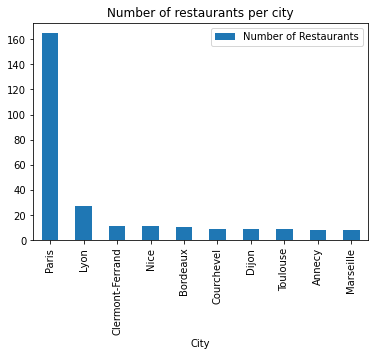

In [215]:
# plotting

df_cities_number_of_restaurants.plot(kind='bar', title='Number of restaurants per city')

### **2) PieChart about Michelin Awards**

In [216]:
# SPARQL Query

In [217]:
%%sparql http://localhost:7200/repositories/final_project -q -s df_awards

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX sh: <https://schema.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

select ?award (count(?s) as ?total_restaurants) where { 

    ?s rdf:type    dbo:Restaurant;
    
    dbp:award ?a.
    
     ?a rdfs:label ?award.
} 

Group by ?award

In [218]:
# renaming the dataframe's columns

df_awards.rename({'award':'Award', 'total_restaurants':'Total'}, axis=1, inplace=True)

In [219]:
# sorting the dataframe alphabetically

df_awards.sort_values("Award", inplace=True)

In [220]:
# adjusting the index

df_awards.set_index('Award', inplace=True)

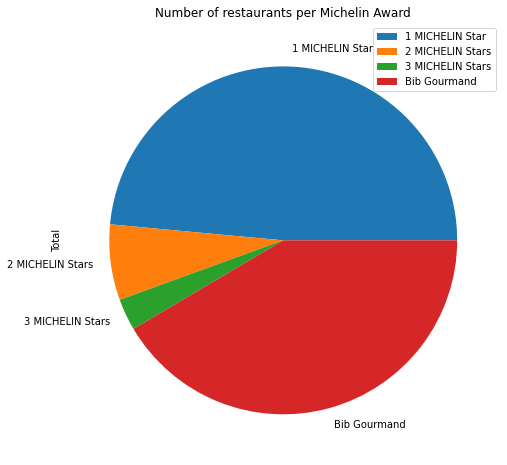

In [221]:
# plotting

df_awards.plot(kind='pie', y='Total', title='Number of restaurants per Michelin Award', figsize=(8, 8)).legend(loc='best')

### **3) Top 3 most popular cuisines**

In [222]:
# SPARQL Query

In [223]:
%%sparql http://localhost:7200/repositories/final_project -q -s df_cuisine_type

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX sh: <https://schema.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

select ?cuisine_type (count(?res) as ?total_restaurants) where { 

    ?res dbp:cuisine ?cui.
    
    ?cui rdfs:label ?cuisine_type.
    
}

group by ?cuisine_type

order by desc(?total_restaurants)

limit 3

In [224]:
# renaming the dataframe's columns

df_cuisine_type.rename({'cuisine_type':'Cuisine', 'total_restaurants':'Total'}, axis=1, inplace=True)

In [225]:
# adjusting the index

df_cuisine_type.set_index('Cuisine', inplace=True)

In [226]:
# colorizing

from itertools import cycle, islice

my_colors = list(islice(cycle(['g', 'r', 'y']), None, len(df_cuisine_type)))

<AxesSubplot:title={'center':'Restaurants per cuisine type'}, xlabel='Cuisine'>

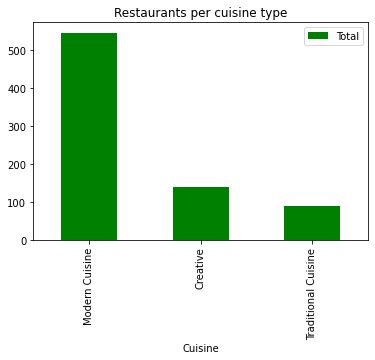

In [227]:
# plotting

from itertools import cycle, islice

df_cuisine_type.plot(kind='bar', title='Restaurants per cuisine type', stacked=True, color=my_colors)

### **4) Most expensive cities and their price information**

In [237]:
# SPARQL Query

In [238]:
%%sparql http://localhost:7200/repositories/final_project -q -s df_expensive_cities_info

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://example.com/base/>

select ?city_label (avg(?price_min) as ?average_min_price) (avg(?price_max) as ?average_max_price) ((?average_min_price+?average_max_price)/2 as ?avg_max_min)
where {
    select ?city_label ?price_min ?price_max
    where{
    ?restaurant ex:minPrice ?price_min;
                ex:maxPrice ?price_max;
                dbp:city ?city.
    ?city rdfs:label ?city_label.
    }
}
group by ?city_label
order by desc(?avg_max_min)
limit 10

In [239]:
df_expensive_cities_info

,city_label,average_min_price,average_max_price,avg_max_min
0,Menton,380,380,380
1,Vonnas,280,345,312.5
2,Murtoli,305,305,305
3,Eugénie-les-Bains,275,310,292.5
4,Veyrier-du-Lac,210,350,280
5,Le Castellet,260,295,277.5
6,Collonges-au-Mont-d'Or,200,310,255
7,La Rochelle,210,280,245
8,Saint-Tropez,218,270.5,244.25
9,Courchevel,187,276.444444444444444444444444,231.722222222222222222222222


In [240]:
# renaming of the dataframe's columns

df_expensive_cities_info.rename({'city_label':'City', 'average_min_price':'Average of the minimum prices', 'average_max_price':'Average of the maximum prices' }, axis=1, inplace=True)

In [241]:
df_expensive_cities_info

,City,Average of the minimum prices,Average of the maximum prices,avg_max_min
0,Menton,380,380,380
1,Vonnas,280,345,312.5
2,Murtoli,305,305,305
3,Eugénie-les-Bains,275,310,292.5
4,Veyrier-du-Lac,210,350,280
5,Le Castellet,260,295,277.5
6,Collonges-au-Mont-d'Or,200,310,255
7,La Rochelle,210,280,245
8,Saint-Tropez,218,270.5,244.25
9,Courchevel,187,276.444444444444444444444444,231.722222222222222222222222


In [242]:
# adjusting the index

df_expensive_cities_info.set_index('City', inplace=True)

In [243]:
# Converting the data type into float

df_expensive_cities_info = df_expensive_cities_info.astype('float')

<AxesSubplot:title={'center':'Price Information about the most expensive cities'}, xlabel='City', ylabel='Price in euros'>

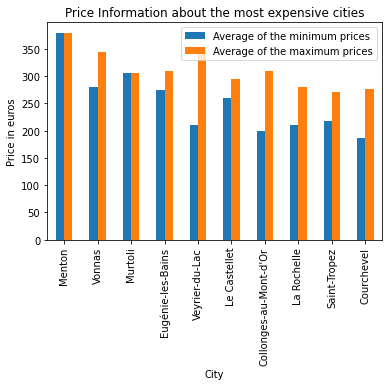

In [244]:
# plotting

df_expensive_cities_info[['Average of the minimum prices', 'Average of the maximum prices']].plot(kind='bar', title='Price Information about the most expensive cities', ylabel='Price in euros')

### **5) Cheapest cities and their price information**

In [245]:
# SPARQL Query

In [246]:
%%sparql http://localhost:7200/repositories/final_project -q -s df_cheapest_cities_info

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ex: <http://example.com/base/>

select ?city_label (avg(?price_min) as ?average_min_price) (avg(?price_max) as ?average_max_price) ((?average_min_price+?average_max_price)/2 as ?avg_max_min)
where {
    select ?city_label ?price_min ?price_max
    where{
    ?restaurant ex:minPrice ?price_min;
                ex:maxPrice ?price_max;
                dbp:city ?city.
    ?city rdfs:label ?city_label.
    }
}
group by ?city_label
order by asc(?avg_max_min)
limit 10

In [247]:
df_cheapest_cities_info

,city_label,average_min_price,average_max_price,avg_max_min
0,Saint-Georges-sur-Cher,16,34,25
1,Château-Thébaud,20,33,26.5
2,Puy-l'Évêque,17,36,26.5
3,Chablis,24,32,28
4,La Chaize-Giraud,21,35,28
5,Saint-Pantaléon,18,39,28.5
6,Saint-André-de-Cubzac,18,42,30
7,Alès,21,40,30.5
8,Saint-Julien-en-Vercors,31,31,31
9,Saules,29,34,31.5


In [248]:
# renaming the dataframe's columns

df_cheapest_cities_info.rename({'city_label':'City', 'average_min_price':'Average of the minimum prices', 'average_max_price':'Average of the maximum prices' }, axis=1, inplace=True)

In [249]:
# adjusting the index

df_cheapest_cities_info.set_index('City', inplace=True)

In [250]:
# Converting the data type into float

df_cheapest_cities_info = df_cheapest_cities_info.astype('float')

<AxesSubplot:title={'center':'Price Information about the cheapest cities'}, xlabel='City', ylabel='Price in euros'>

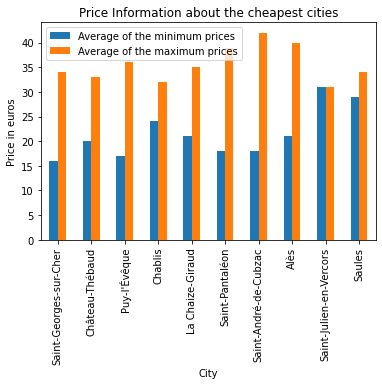

In [251]:
# plotting

df_cheapest_cities_info[['Average of the minimum prices', 'Average of the maximum prices']].plot(kind='bar', title='Price Information about the cheapest cities', ylabel='Price in euros')